### Importing Libraries to be Used

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset 


In [47]:
df = pd.read_csv(r"C:\Users\USER\Downloads\archive (17)\retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


### Checking the Amount of Rows and Columns in the Dataset

In [48]:
df.shape

(1000, 9)

### Checking the Data Types in the Dataset

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Converting the Date column to Datetime type

In [50]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

### Checking for Duplicated Columns

In [51]:
df.duplicated().sum()

0

### Checking for Null Columns

In [52]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Taking a quick statistics of the dataset

In [53]:
df.describe(include = int )

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Checking for the Average Age of Customers

In [54]:
Avg_age = round(df['Age'].mean())
Avg_age

41

### Forming Age Groups for Further Analysis

In [55]:
df['Age Group'] = pd.qcut(df['Age'], 4, labels = ['Young Adult', 'Middle Aged Adults', 'Late Aged Adult', 'Old'])
df['Age Group']

0      Middle Aged Adults
1             Young Adult
2         Late Aged Adult
3      Middle Aged Adults
4      Middle Aged Adults
              ...        
995                   Old
996       Late Aged Adult
997           Young Adult
998    Middle Aged Adults
999       Late Aged Adult
Name: Age Group, Length: 1000, dtype: category
Categories (4, object): ['Young Adult' < 'Middle Aged Adults' < 'Late Aged Adult' < 'Old']

### Calculating Revenue by Age Group and Visualizing the Result with a Bar Chart

In [56]:
Revenue_Age_Group = df.groupby(['Age Group'], observed = True)['Total Amount'].sum()
Revenue_Age_Group

Age Group
Young Adult           123155
Middle Aged Adults    119890
Late Aged Adult       112260
Old                   100695
Name: Total Amount, dtype: int64

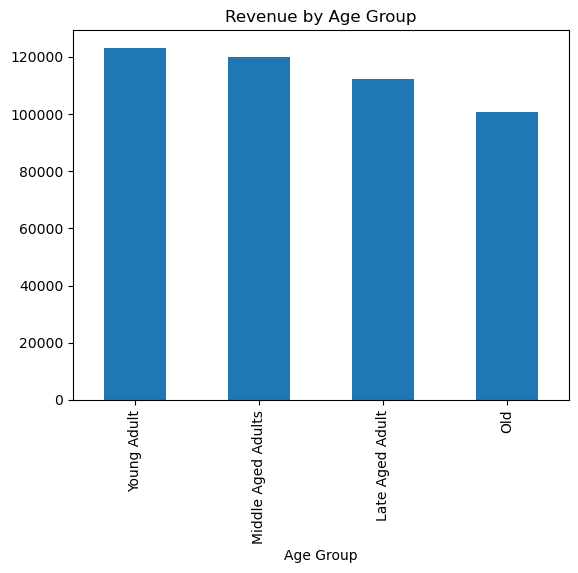

In [57]:
Revenue_Age_Group.plot(kind = 'bar')
plt.title('Revenue by Age Group')
plt.show()

### Calculating the Average Across Genders and Visualizing it with a Pie Chart

In [58]:
Gender_Dist = df.groupby('Gender')['Age'].mean()
Gender_Dist

Gender
Female    41.356863
Male      41.428571
Name: Age, dtype: float64

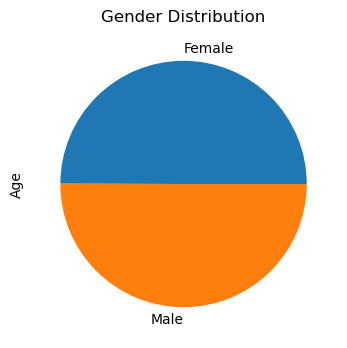

In [59]:
plt.figure(figsize = (6,4))
Gender_Dist.plot(kind = 'pie' )
plt.title('Gender Distribution')
plt.show()

### Calculating the Revenue Generated by Gender and Visualizing it with a Pie Chart

In [60]:
Revenue_by_gender = df.groupby('Gender')['Total Amount'].sum()
Revenue_by_gender

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

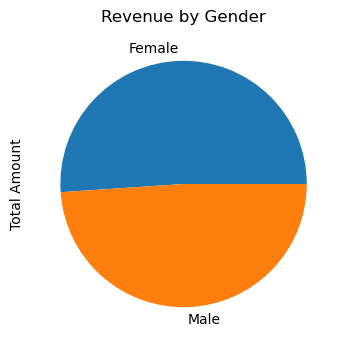

In [61]:
plt.figure(figsize = (6,4))
Revenue_by_gender.plot(kind = 'pie' )
plt.title('Revenue by Gender')
plt.show()

### Calculating the Average Order Value

In [62]:
Total_Revenue = df['Total Amount'].sum()

In [63]:
Total_Orders = df['Transaction ID'].value_counts().sum()

In [64]:
Average_Order_Value = Total_Revenue/ Total_Orders
Average_Order_Value

456.0

### Calculating the Revenue Generated by each Product Category and visualizing it with a Bar Chart

In [65]:
Revenue_by_Prod_Cat = df.groupby('Product Category')['Total Amount'].sum()
Revenue_by_Prod_Cat

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

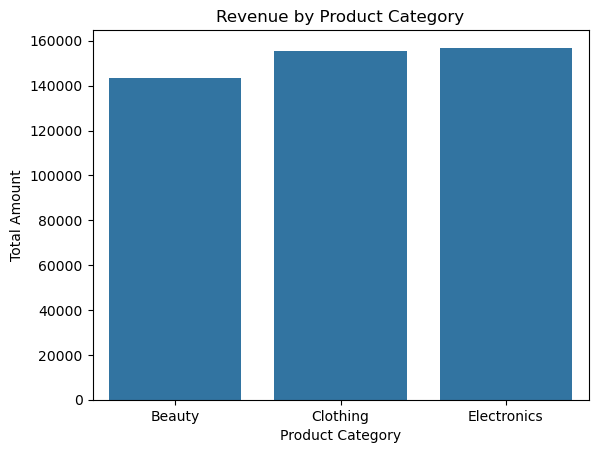

In [66]:
sns.barplot(Revenue_by_Prod_Cat)
plt.title('Revenue by Product Category')
plt.show()

### Calculating the Quantity Sold Per Product Category and Visualizing it with a Bar Chart

In [67]:
Qty_Sold_by_Prod_Cat = df.groupby('Product Category')['Quantity'].sum()
Qty_Sold_by_Prod_Cat

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

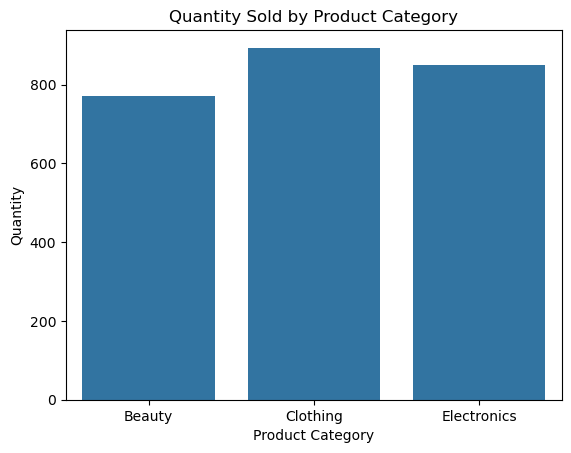

In [68]:
sns.barplot(Qty_Sold_by_Prod_Cat)
plt.title('Quantity Sold by Product Category')
plt.show()

### Finding Gender that Generated more Revenue Per Product Category and visualizing it with a Clustered Bar Chart

In [69]:
Revenue_by_Gen_Cat = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack()
Revenue_by_Gen_Cat

Gender,Female,Male
Product Category,,
Beauty,74830,68685
Clothing,81275,74305
Electronics,76735,80170


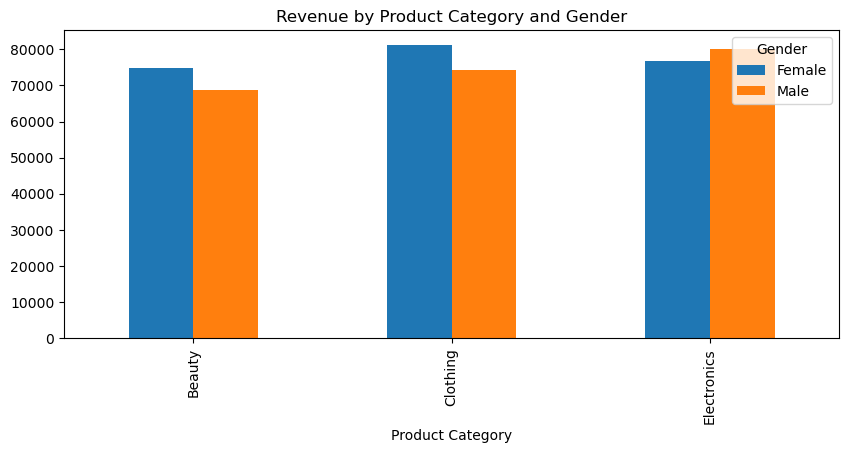

In [70]:
Revenue_by_Gen_Cat.plot(kind = 'bar', figsize = (10,4))
plt.title('Revenue by Product Category and Gender')
plt.show()


### Finding which Age Group Generated more Revenue Per Product Category and visualizing it with a Clustered Bar Chart

In [71]:
Revenue_by_age_group_cat = df.groupby(['Age Group','Product Category'], observed=True)['Total Amount'].sum().unstack()
Revenue_by_age_group_cat

Product Category,Beauty,Clothing,Electronics
Age Group,,,
Young Adult,41400,46150,35605
Middle Aged Adults,42845,37160,39885
Late Aged Adult,35610,37765,38885
Old,23660,34505,42530


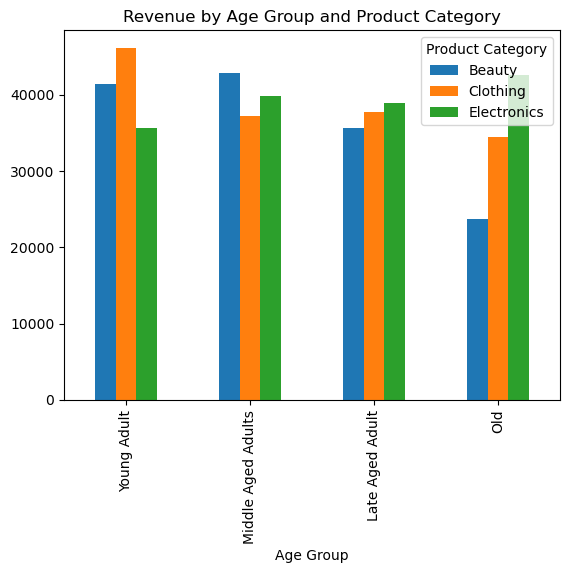

In [72]:
Revenue_by_age_group_cat.plot(kind= 'bar')
plt.title('Revenue by Age Group and Product Category')
plt.show()

### Checking if any Customer Purchased More than Once

In [73]:
df['Customer ID'].duplicated().sum()

0

### Calculating Revenue and Quantity Sold by Month and visualizing it with a Line Chart

In [74]:
Month = pd.Categorical(df['Date'].dt.month_name().str[:3], categories =['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'], ordered = True)
Month

['Nov', 'Feb', 'Jan', 'May', 'May', ..., 'May', 'Nov', 'Oct', 'Dec', 'Apr']
Length: 1000
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [75]:
Revenue_by_Month = df.groupby(Month, observed =  True)['Total Amount'].sum()
Revenue_by_Month

Jan    36980
Feb    44060
Mar    28990
Apr    33870
May    53150
Jun    36715
Jul    35465
Aug    36960
Sep    23620
Oct    46580
Nov    34920
Dec    44690
Name: Total Amount, dtype: int64

In [76]:
Quantity_by_Month = df.groupby(Month, observed =  True)['Quantity'].sum()
Quantity_by_Month

Jan    199
Feb    214
Mar    194
Apr    214
May    259
Jun    197
Jul    176
Aug    227
Sep    170
Oct    252
Nov    205
Dec    207
Name: Quantity, dtype: int64

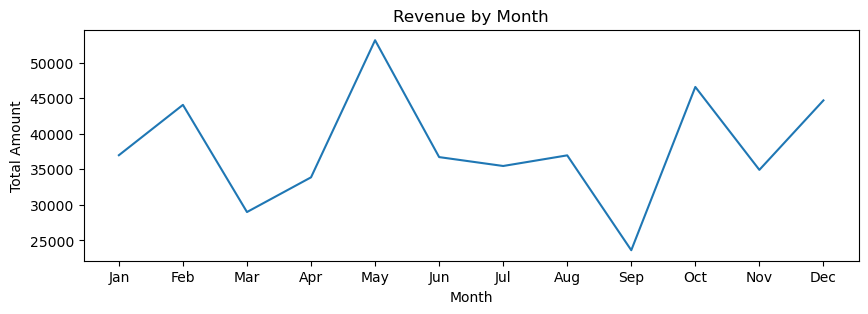

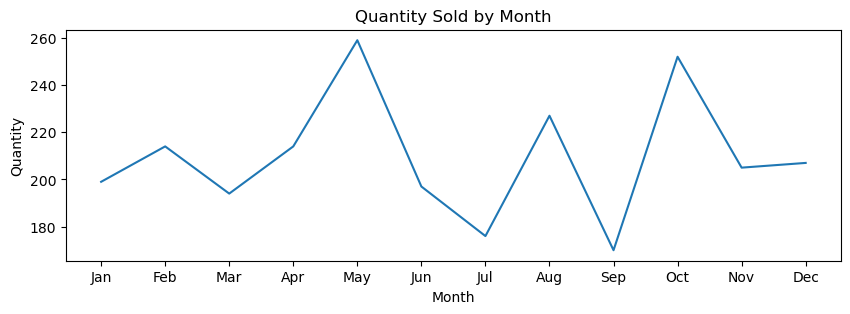

In [77]:
plt.figure(figsize = (10,3))
sns.lineplot(Revenue_by_Month)
plt.title('Revenue by Month')
plt.xlabel('Month')

plt.figure(figsize = (10,3))
sns.lineplot(Quantity_by_Month)
plt.title('Quantity Sold by Month')
plt.xlabel('Month')

plt.show()

### Investigating Why Revenue and Quantity Sold Trend Don't Match. The average order value for months that sold much Products but didn't generate much revenue is low

In [78]:
round(df.groupby(Month, observed = True)['Total Amount'].mean(),2)

Jan    474.10
Feb    518.35
Mar    397.12
Apr    393.84
May    506.19
Jun    476.82
Jul    492.57
Aug    393.19
Sep    363.38
Oct    485.21
Nov    447.69
Dec    491.10
Name: Total Amount, dtype: float64

### Average Cost of Products

In [79]:
df.groupby('Product Category')['Total Amount'].mean()

Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64

### Calculating Revenue and Quantity Sold by Day of Week and visualizing it with a Line Chart

In [80]:
Day_of_Week = pd.Categorical(df['Date'].dt.day_name(), categories = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                                                 'Friday', 'Saturday'], ordered = True)
Day_of_Week

['Friday', 'Monday', 'Friday', 'Sunday', 'Saturday', ..., 'Tuesday', 'Friday', 'Sunday', 'Tuesday', 'Wednesday']
Length: 1000
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [81]:
Revenue_by_Day_of_Week = df.groupby(Day_of_Week, observed =  True)['Total Amount'].sum()
Revenue_by_Day_of_Week

Sunday       58600
Monday       70250
Tuesday      69440
Wednesday    58770
Thursday     53835
Friday       66290
Saturday     78815
Name: Total Amount, dtype: int64

In [82]:
Quantity_by_Day_of_Week = df.groupby(Day_of_Week, observed =  True)['Quantity'].sum()
Quantity_by_Day_of_Week

Sunday       329
Monday       385
Tuesday      397
Wednesday    356
Thursday     301
Friday       373
Saturday     373
Name: Quantity, dtype: int64

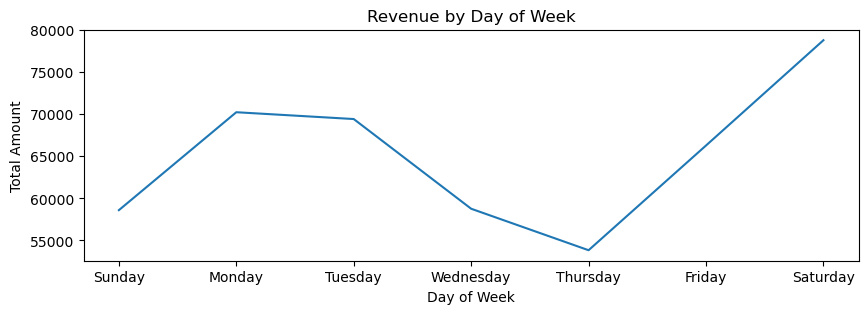

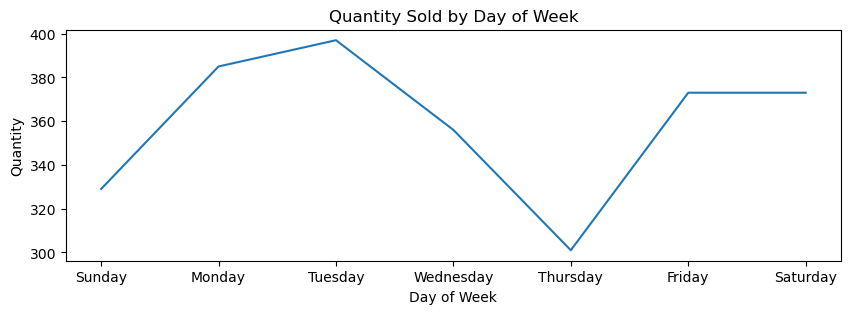

In [83]:
plt.figure(figsize = (10,3))
sns.lineplot(Revenue_by_Day_of_Week)
plt.title('Revenue by Day of Week')
plt.xlabel('Day of Week')

plt.figure(figsize = (10,3))
sns.lineplot(Quantity_by_Day_of_Week)
plt.title('Quantity Sold by Day of Week')
plt.xlabel('Day of Week')

plt.show()

### Average Revenue Per Week Day

In [84]:
round(df.groupby(Day_of_Week, observed = True)['Total Amount'].mean(),2)

Sunday       424.64
Monday       481.16
Tuesday      431.30
Wednesday    422.81
Thursday     437.68
Friday       463.57
Saturday     525.43
Name: Total Amount, dtype: float64

## Recommendations
### 1. Age Based Marketing: Market product categories that each age groups spend more on
### 2. Seasonal Sales Planning: Prepare campaigns for peak months and low periods
### 3. Categorize products by sales contribution to optimize stock levels
### 4. Giving discounts for goods with low sales and during low sales periods



